In [1]:
import pandas as pd
df=pd.read_csv('./dataset/chat_df.csv')
df.head()

,성별,나이,학력,전공,학습이해도,사용기간,만족도,학습효과,인지,감성,사회,심리,몰입감,상호작용,불편함
0,남,20대,대졸,기술,51 ~ 70%,2개월,4.5,4.9,5.0,3.0,1.0,1.0,5,5.000000,3.0
1,여,30대,고졸,NaN,51 ~ 70%,3,3.8,3.7,4.0,3.5,2.5,2.0,3,3.000000,4.0
2,여,20대,대졸,경제학,51 ~ 70%,2개월,4.7,4.6,4.0,2.0,1.0,1.0,1,4.000000,4.0
3,남,20대,대졸,기계공학,51 ~ 70%,4,4.8,4.6,5.0,4.5,1.0,2.5,1,4.666667,4.0
4,여,20대,대재,글로벌MICE,51 ~ 70%,3,4.4,4.1,4.0,4.5,1.5,3.0,2,2.666667,5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      21 non-null     object 
 1   나이      21 non-null     object 
 2   학력      21 non-null     object 
 3   전공      19 non-null     object 
 4   학습이해도   20 non-null     object 
 5   사용기간    21 non-null     object 
 6   만족도     21 non-null     float64
 7   학습효과    21 non-null     float64
 8   인지      21 non-null     float64
 9   감성      21 non-null     float64
 10  사회      21 non-null     float64
 11  심리      21 non-null     float64
 12  몰입감     21 non-null     int64  
 13  상호작용    21 non-null     float64
 14  불편함     20 non-null     float64
dtypes: float64(8), int64(1), object(6)
memory usage: 2.6+ KB


In [4]:
def categorize_major(major):
    if major in ['기술', '기계공학', '전자정보통신', '컴퓨터소프트웨어', '수학','의료공학과','생명과학',\
                 'Management Information System','빅데이터']:
        return '과학'
    elif major in ['경제학','글로벌MICE','행정학','경영학과','무역학과']:
        return '사회과학'
    else:  
        return '기타'
from sklearn.preprocessing import LabelEncoder

def label_encode(df, columns):
    for col in columns:
        le=LabelEncoder()
        df[col]=le.fit_transform(df[col])
    return df

In [6]:
df.학습이해도.describe()

count           20
unique           5
top       51 ~ 70%
freq            10
Name: 학습이해도, dtype: object

In [25]:
# str.extract() 메소드는 정규표현식(regular expression)을 사용하여 문자열에서 특정 패턴에 맞는 부분을 추출
# 여기서 사용된 정규표현식 '(\d)'는 한 개의 숫자를 의미합니다.

cdf = df.copy()
cdf['사용기간'] = cdf['사용기간'].astype(str)
cdf['사용기간'] = cdf['사용기간'].str.extract('(\d)')
cdf['나이'] = cdf['나이'].str.extract('(\d+)')
cdf = label_encode(cdf, ['성별', '학력','전공','사용기간','나이'])
cdf

,성별,나이,학력,전공,학습이해도,사용기간,만족도,학습효과,인지,감성,사회,심리,몰입감,상호작용,불편함
0,0,0,2,6,51 ~ 70%,1,4.5,4.9,5.0,3.0,1.0,1.0,5,5.000000,3.0
1,1,1,0,19,51 ~ 70%,2,3.8,3.7,4.0,3.5,2.5,2.0,3,3.000000,4.0
2,1,0,2,3,51 ~ 70%,1,4.7,4.6,4.0,2.0,1.0,1.0,1,4.000000,4.0
3,0,0,2,5,51 ~ 70%,3,4.8,4.6,5.0,4.5,1.0,2.5,1,4.666667,4.0
4,1,0,1,4,51 ~ 70%,2,4.4,4.1,4.0,4.5,1.5,3.0,2,2.666667,5.0
5,0,0,2,18,71 ~ 80%,2,4.0,3.9,4.5,3.5,2.0,2.0,4,4.000000,3.0
6,0,0,2,16,51 ~ 70%,2,4.0,4.0,3.5,4.0,3.5,3.5,4,3.000000,3.0
7,1,0,2,2,50% 미만,2,3.9,3.5,4.0,2.5,2.5,1.0,3,3.666667,5.0
8,0,0,2,17,50% 미만,0,4.4,3.5,4.5,2.0,1.0,3.0,1,4.666667,3.0
9,0,2,2,11,71 ~ 80%,2,4.3,3.9,4.5,3.5,3.5,3.5,4,3.666667,2.0


In [27]:
cdf['이해도'] = cdf['학습이해도'].apply(lambda x : 0 if x == '50% 미만' else\
                                (1 if x == '51 ~ 70%' else (2 if x == '71 ~ 80%' else 4)))    # 이해도 열을 만듦

In [28]:
cdf = cdf.drop('학습이해도',axis=1)
cdf.head()

,성별,나이,학력,전공,사용기간,만족도,학습효과,인지,감성,사회,심리,몰입감,상호작용,불편함,이해도
0,0,0,2,6,1,4.5,4.9,5.0,3.0,1.0,1.0,5,5.000000,3.0,1
1,1,1,0,19,2,3.8,3.7,4.0,3.5,2.5,2.0,3,3.000000,4.0,1
2,1,0,2,3,1,4.7,4.6,4.0,2.0,1.0,1.0,1,4.000000,4.0,1
3,0,0,2,5,3,4.8,4.6,5.0,4.5,1.0,2.5,1,4.666667,4.0,1
4,1,0,1,4,2,4.4,4.1,4.0,4.5,1.5,3.0,2,2.666667,5.0,1


In [14]:
cdf.불편함.value_counts()

3.0    7
4.0    6
2.0    4
5.0    2
1.0    1
Name: 불편함, dtype: int64

In [82]:
cdf['불편함'] = cdf['불편함'].fillna(cdf['불편함'].median())           # 널값 중간값으로 대체
cdf.불편함.isnull().sum()

0

In [83]:
cdf = cdf[['성별', '나이', '학력', '전공', '사용기간', '인지', '감성', '사회', '심리', \
           '몰입감', '상호작용', '불편함', '이해도', '학습효과', '만족도']]

# 열 순서 바꾸기
cdf.head()

,성별,나이,학력,전공,사용기간,인지,감성,사회,심리,몰입감,상호작용,불편함,이해도,학습효과,만족도
0,0,0,2,6,1,5.0,3.0,1.0,1.0,5,5.000000,3.0,1,4.9,4.5
1,1,1,0,19,2,4.0,3.5,2.5,2.0,3,3.000000,4.0,1,3.7,3.8
2,1,0,2,3,1,4.0,2.0,1.0,1.0,1,4.000000,4.0,1,4.6,4.7
3,0,0,2,5,3,5.0,4.5,1.0,2.5,1,4.666667,4.0,1,4.6,4.8
4,1,0,1,4,2,4.0,4.5,1.5,3.0,2,2.666667,5.0,1,4.1,4.4


In [41]:
import matplotlib.font_manager as fm
font_list = [f.name for f in fm.fontManager.ttflist]

han_fonts = [font_name for font_name in font_list if  'Gothic' in font_name]
print(han_fonts)

['Franklin Gothic Book', 'Franklin Gothic Demi', 'Franklin Gothic Heavy', 'Malgun Gothic', 'Hancom Gothic', 'HYGothic-Medium', 'Yu Gothic', 'MS Gothic', 'Yu Gothic', 'Malgun Gothic', 'Century Gothic', 'Malgun Gothic', 'Franklin Gothic Demi', 'Century Gothic', 'Franklin Gothic Demi Cond', 'Franklin Gothic Medium Cond', 'Franklin Gothic Book', 'Franklin Gothic Heavy', 'Century Gothic', 'Yu Gothic', 'HYGothic-Extra', 'Century Gothic', 'Copperplate Gothic Light', 'Hancom Gothic', 'Hancom Gothic', 'Showcard Gothic', 'Franklin Gothic Demi', 'Century Gothic', 'Yu Gothic', 'Yu Gothic', 'Showcard Gothic', 'Franklin Gothic Medium', 'Yu Gothic', 'Franklin Gothic Heavy', 'Franklin Gothic Book', 'HYGothic-Extra', 'Franklin Gothic Heavy', 'Franklin Gothic Demi', 'Franklin Gothic Medium', 'Copperplate Gothic Bold', 'Franklin Gothic Medium', 'Malgun Gothic', 'Franklin Gothic Medium Cond', 'Century Gothic', 'Malgun Gothic', 'Franklin Gothic Demi Cond', 'Franklin Gothic Book', 'Copperplate Gothic Light'

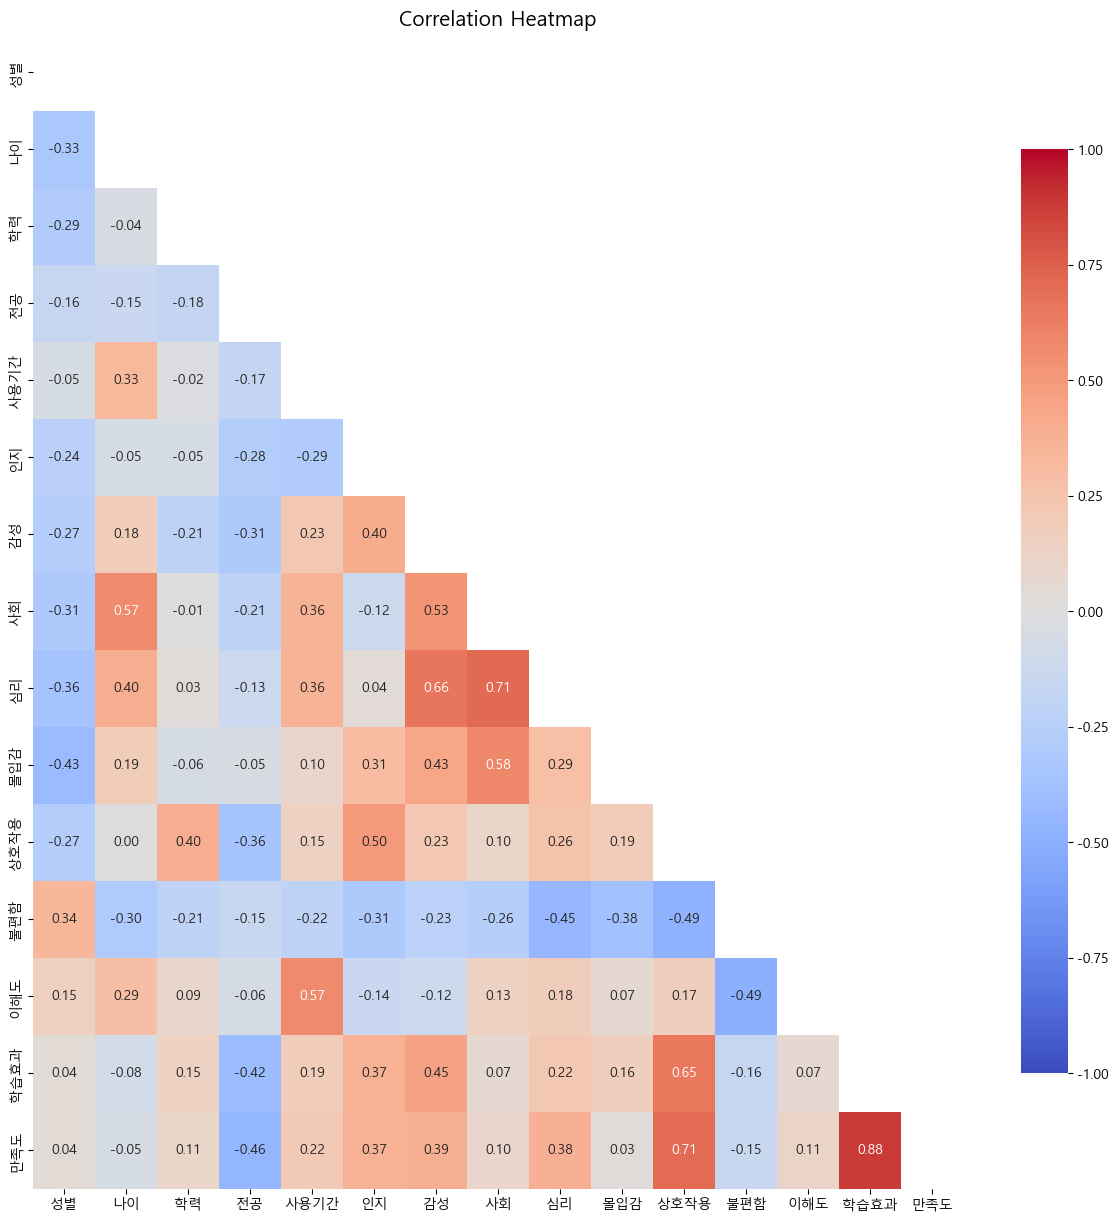

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#한글폰트 설정
from matplotlib import rc
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')


# 한글을 지원하는 폰트로 설정합니다. 여기에서는 'NanumGothic'을 예로 들었습니다. 
plt.rcParams["font.family"] = 'Malgun Gothic' 
mpl.rcParams['axes.unicode_minus'] = False

# 상관계수 행렬 계산
corr = cdf.corr()

# 상관계수 행렬의 상삼각행렬의 마스크를 생성 
mask = np.triu(np.ones_like(corr, dtype=bool))

# 그림 사이즈 설정
plt.figure(figsize=(15,15))

# 마스크를 적용한 삼각형 히트맵 그리기
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1, cbar_kws={"shrink": .8})

# 타이틀 설정
plt.title('Correlation Heatmap', fontsize=15)
plt.show()


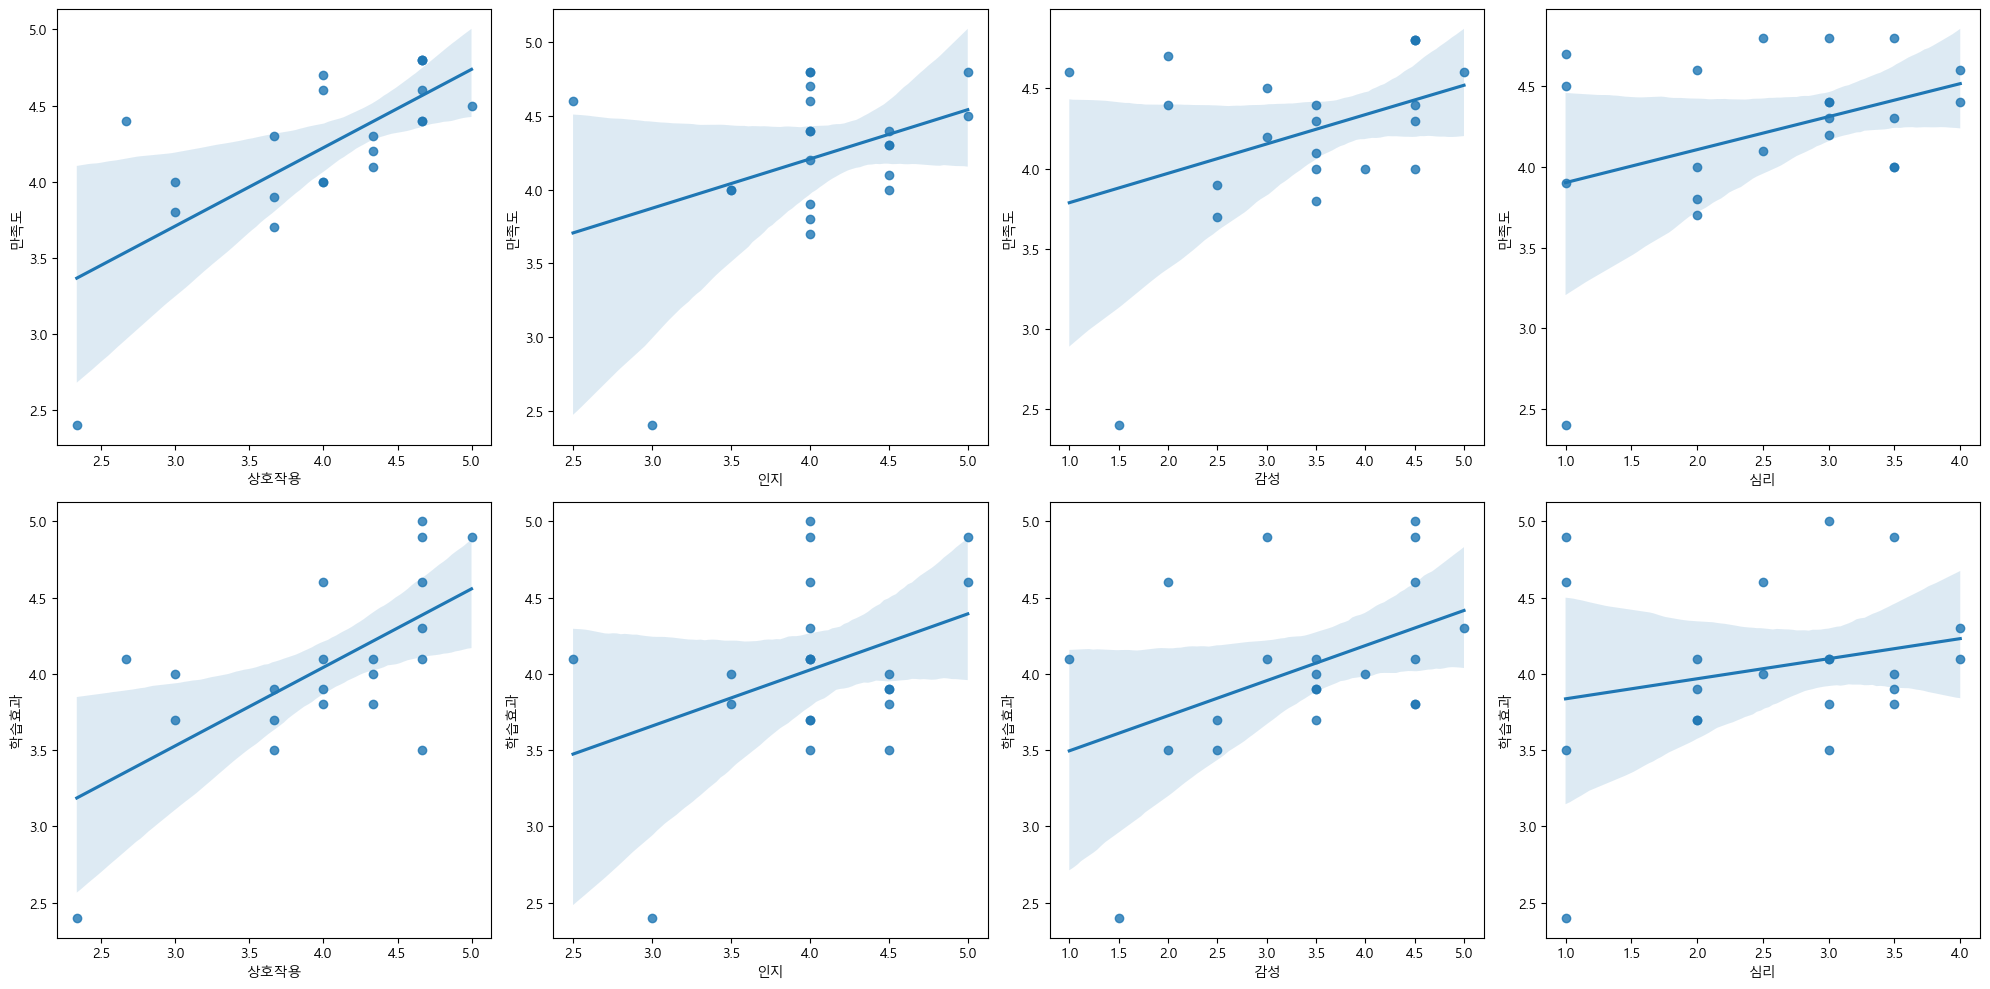

In [45]:
#상호작용 감성 심리 인지 사용기간 학력/이해도 사회 성별 몰입감 전공 나이 불편함

import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

sns.regplot(data=cdf, x="상호작용", y="만족도",ax=axs[0,0]) 
sns.regplot (data=cdf, x="인지", y="만족도", ax=axs[0,1]) 
sns.regplot(data=cdf, x="감성", y="만족도",ax=axs[0,2]) 
sns.regplot(data=cdf, x="심리", y="만족도", ax=axs[0,3]) 
sns.regplot(data=cdf, x="상호작용", y="학습효과", ax=axs[1,0])
sns.regplot(data=cdf, x="인지", y="학습효과", ax=axs[1,1]) 
sns.regplot(data=cdf, x="감성", y="학습효과", ax=axs[1,2]) 
sns.regplot(data=cdf, x="심리", y="학습효과", ax=axs[1,3])
            
plt.tight_layout() 
plt.show()

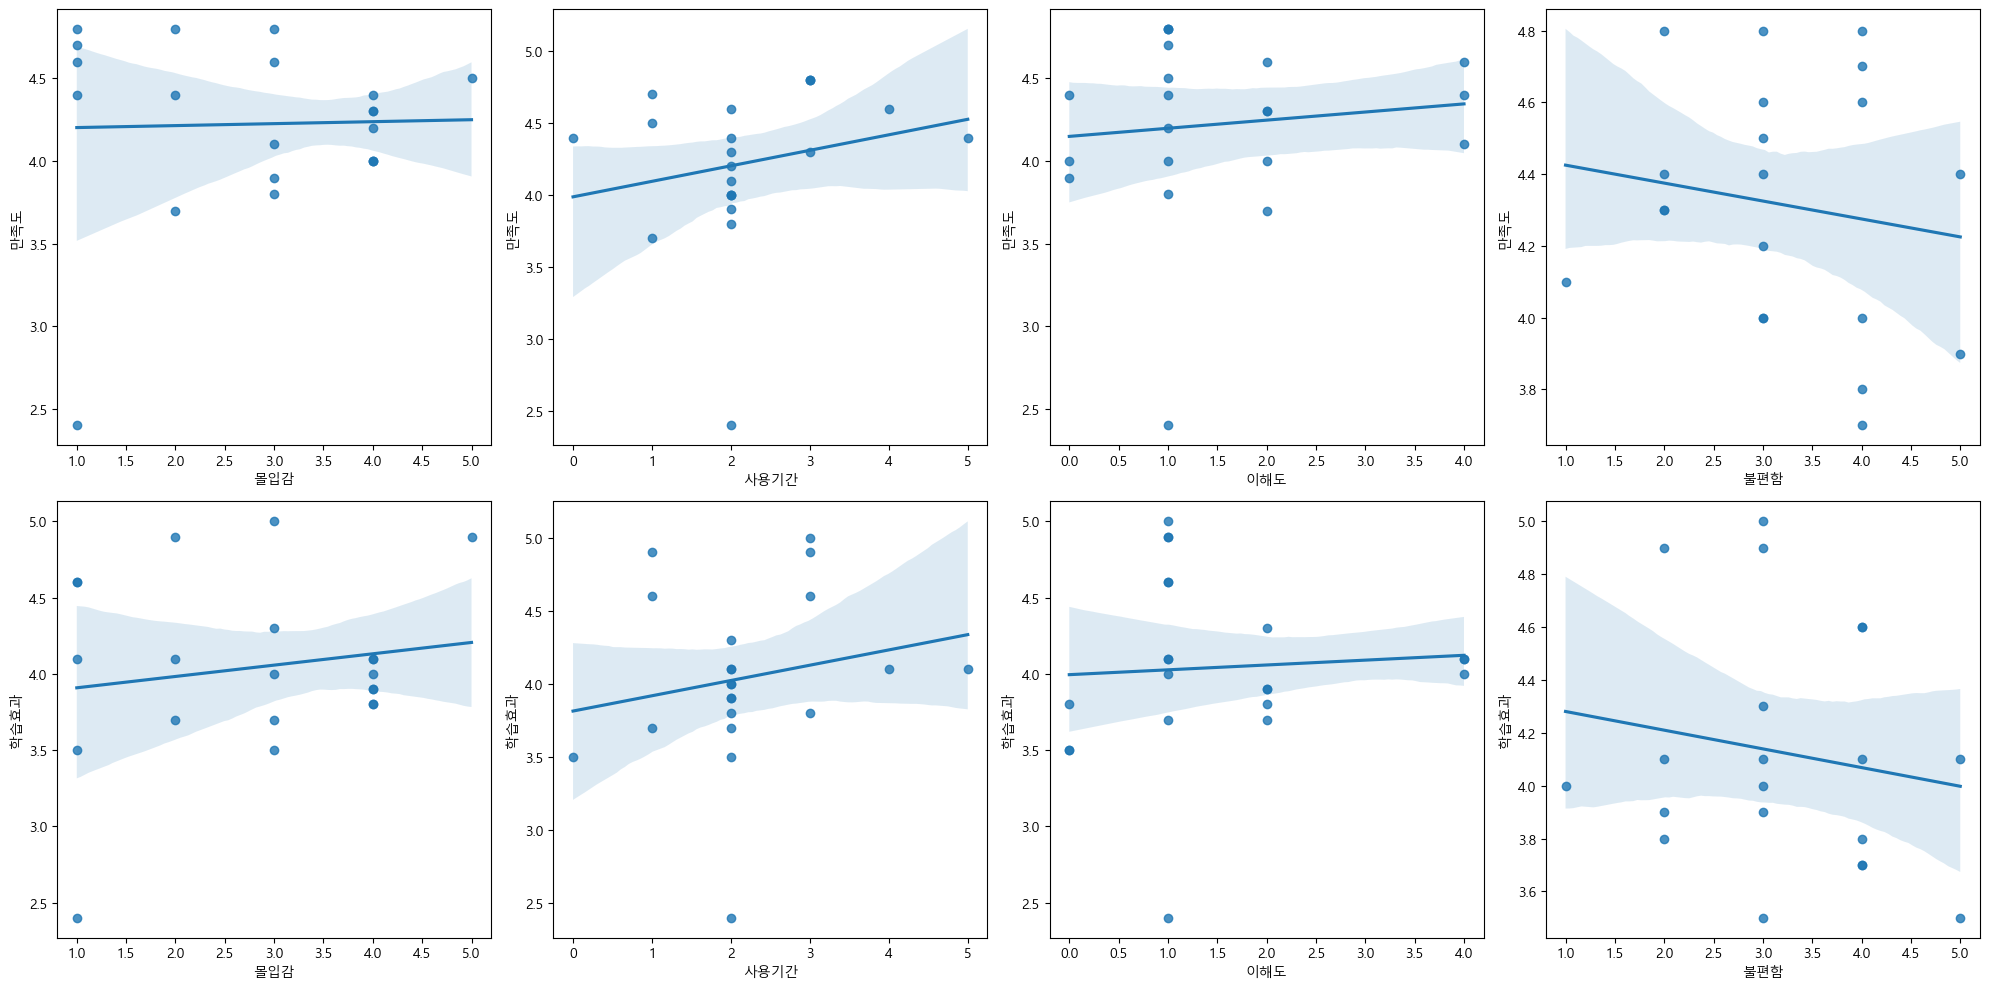

In [46]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

sns.regplot(data=cdf, x="몰입감", y="만족도",ax=axs[0,0]) 
sns.regplot (data=cdf, x="사용기간", y="만족도", ax=axs[0,1]) 
sns.regplot(data=cdf, x="이해도", y="만족도",ax=axs[0,2]) 
sns.regplot(data=cdf, x="불편함", y="만족도", ax=axs[0,3]) 
sns.regplot(data=cdf, x="몰입감", y="학습효과", ax=axs[1,0])
sns.regplot(data=cdf, x="사용기간", y="학습효과", ax=axs[1,1]) 
sns.regplot(data=cdf, x="이해도", y="학습효과", ax=axs[1,2]) 
sns.regplot(data=cdf, x="불편함", y="학습효과", ax=axs[1,3])
            
plt.tight_layout() 
plt.show()

<AxesSubplot:xlabel='학습효과', ylabel='Count'>

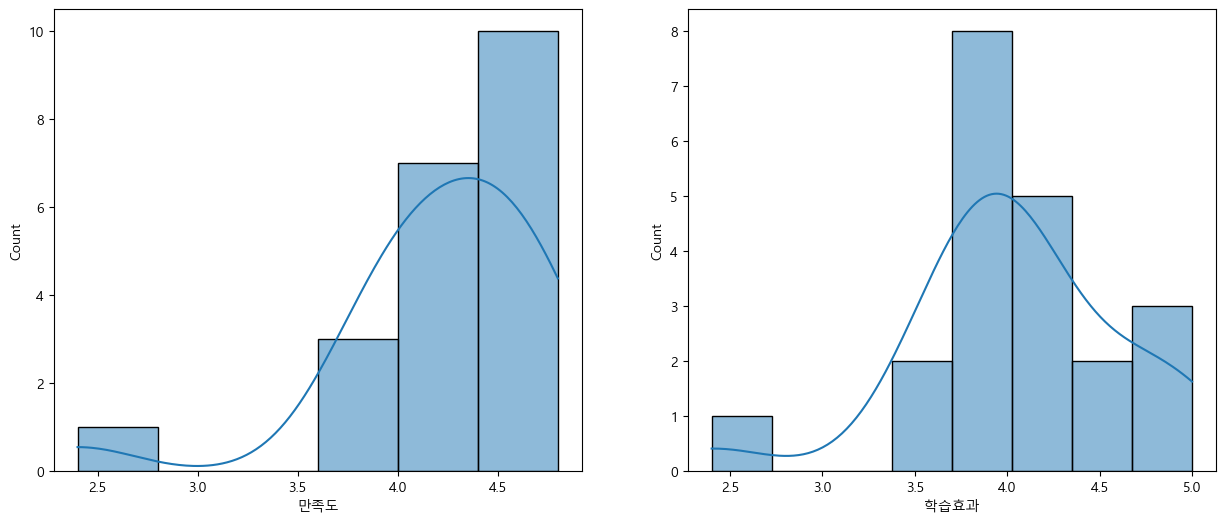

In [47]:
import seaborn as sns

fig, ax = plt.subplots(1,2,figsize = (15,6))

sns.histplot(data=cdf, x ='만족도', kde=True, ax=ax[0])
sns.histplot(data=cdf, x ='학습효과', kde=True, ax=ax[1])

In [84]:
cdf.to_csv('cdf.csv', index=False)   # 어느정도 전처리한 걸 저장
cdf = pd.read_csv('cdf.csv')
cdf.head()

,성별,나이,학력,전공,사용기간,인지,감성,사회,심리,몰입감,상호작용,불편함,이해도,학습효과,만족도
0,0,0,2,6,1,5.0,3.0,1.0,1.0,5,5.000000,3.0,1,4.9,4.5
1,1,1,0,19,2,4.0,3.5,2.5,2.0,3,3.000000,4.0,1,3.7,3.8
2,1,0,2,3,1,4.0,2.0,1.0,1.0,1,4.000000,4.0,1,4.6,4.7
3,0,0,2,5,3,5.0,4.5,1.0,2.5,1,4.666667,4.0,1,4.6,4.8
4,1,0,1,4,2,4.0,4.5,1.5,3.0,2,2.666667,5.0,1,4.1,4.4


In [85]:
cdf1 = cdf[['인지', '감성', '심리', '상호작용', '불편함','만족도']]   # 학습효과의 선형회귀를 만들기 위한 칼럼 뽑기
cdf2 = cdf[['인지', '감성', '심리', '상호작용', '불편함','학습효과']] # 만족도의 선형회귀를 만들기 위한 칼럼 뽑기

In [86]:
cdf1.head()

,인지,감성,심리,상호작용,불편함,만족도
0,5.0,3.0,1.0,5.000000,3.0,4.5
1,4.0,3.5,2.0,3.000000,4.0,3.8
2,4.0,2.0,1.0,4.000000,4.0,4.7
3,5.0,4.5,2.5,4.666667,4.0,4.8
4,4.0,4.5,3.0,2.666667,5.0,4.4


In [87]:
cdf1

,인지,감성,심리,상호작용,불편함,만족도
0,5.0,3.0,1.0,5.000000,3.0,4.5
1,4.0,3.5,2.0,3.000000,4.0,3.8
2,4.0,2.0,1.0,4.000000,4.0,4.7
3,5.0,4.5,2.5,4.666667,4.0,4.8
4,4.0,4.5,3.0,2.666667,5.0,4.4
5,4.5,3.5,2.0,4.000000,3.0,4.0
6,3.5,4.0,3.5,3.000000,3.0,4.0
7,4.0,2.5,1.0,3.666667,5.0,3.9
8,4.5,2.0,3.0,4.666667,3.0,4.4
9,4.5,3.5,3.5,3.666667,2.0,4.3


In [101]:
# 만족도
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

# 독립 변수와 종속 변수 설정
# X와 y를 실제 데이터에 맞게 수정해야 합니다.
X_data=cdf1.drop(['만족도'],axis=1, inplace=False)
y_target=cdf1['만족도']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=1)
# Linear Regression OLS로 학습/예측/평가 수행.

lr= LinearRegression()
lr.fit(X_train,y_train )
y_preds= lr.predict(X_test)
mse =mean_squared_error (y_test, y_preds)
rmse= np.sqrt(mse)
print('MSE:{0:.3f}, RMSE :{1:.3F}'.format(mse, rmse))

MSE:0.067, RMSE :0.260


In [96]:
# 교차검증
from sklearn.model_selection import cross_val_score
import numpy as np

X_data = cdf1.drop(['만족도'], axis=1)
y_target = cdf1['만족도']
Ir = LinearRegression()
neg_mse_scores = cross_val_score (Ir, X_data, y_target, scoring="neg_mean_squared_error", cv=5) 
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np. mean (rmse_scores)
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: {:.3f}'.format(avg_rmse))

5 folds의 개별 RMSE scores: [0.61 0.32 0.49 0.66 0.66]
5 folds의 평균 RMSE: 0.551


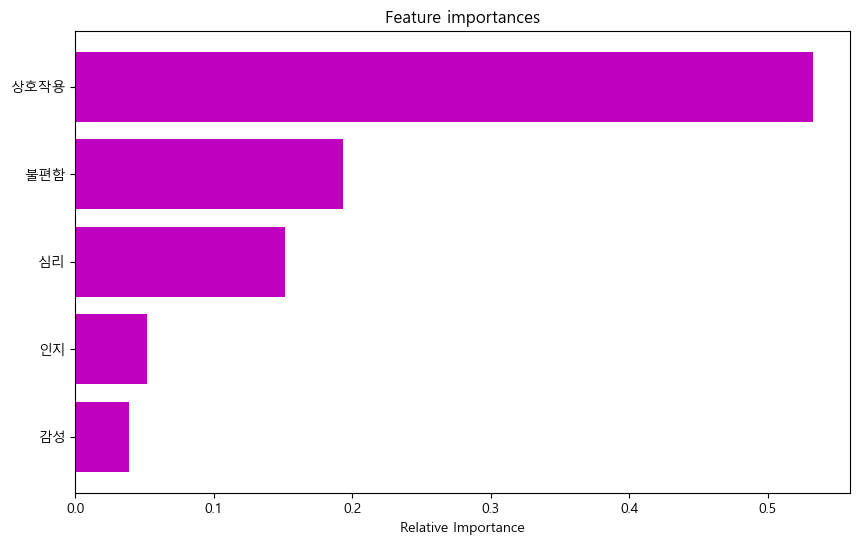

In [100]:
#feature importance 시각화

Ir.fit(X_data, y_target) 
importance = np.abs(Ir.coef_) 
feature_names = X_data.columns 
indices = np.argsort (importance)

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.barh(range(len(indices)), importance [indices], color='m', align='center') 
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Ridge, Lasso, Elasticnet으로 선형회귀 모델 생성 및 평가하세요

In [103]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

#alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose:
        print('#######', model_name, '#######')
    for param in params:
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.5)
            
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n,
                                         scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model. fit (X_data_n, y_target_n)
        
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha: ' + str(param)
            coeff_df[colname] = coeff

    return coeff_df
# end of get_linear_reg_eval


In [105]:
ridge_alphas = [0.0, 0.05, 0.1, 0.5]
coeff_ridge_df = get_linear_reg_eval('Ridge', params=ridge_alphas,
                                     X_data_n=X_data, y_target_n=y_target)

####### Ridge #######
alpha 0.0일 때 5 폴드 세트의 평균 RMSE: 0.551
alpha 0.05일 때 5 폴드 세트의 평균 RMSE: 0.548
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.545
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 0.529


In [107]:
lasso_alphas = [0.0, 0.05, 0.1, 0.5] 
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas,
                                     X_data_n=X_data, y_target_n=y_target)

####### Lasso #######
alpha 0.0일 때 5 폴드 세트의 평균 RMSE: 0.551
alpha 0.05일 때 5 폴드 세트의 평균 RMSE: 0.516
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.470
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 0.490
